In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

# Classification

knn logreg randomforest

In [ ]:
#https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv
ap = pd.read_csv("application_record.csv")
credit = pd.read_csv("credit_record.csv")
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
credit["STATUS"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: STATUS
Non-Null Count    Dtype 
--------------    ----- 
1048575 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB


In [ ]:
credit['STATUS'] = credit['STATUS'].replace(["0", "1", "2", "3", "4", "5"], 1)
credit['STATUS'] = credit['STATUS'].replace(['C','X',], [0, 0])

In [ ]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [ ]:
ap

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
ap['ID'].nunique()

438510

In [ ]:
credit['ID'].nunique()

45985

In [ ]:
ap = ap.drop_duplicates('ID', keep='last')
ap.drop('OCCUPATION_TYPE', axis=1, inplace=True)

<ipython-input-122-3a9a5b501d88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap.drop('OCCUPATION_TYPE', axis=1, inplace=True)


In [ ]:
df = ap.join(credit.set_index('ID'), on='ID', how='inner')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,0
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
434812,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,1


In [ ]:
df['STATUS'].value_counts(normalize=True)

0    0.611388
1    0.388612
Name: STATUS, dtype: float64

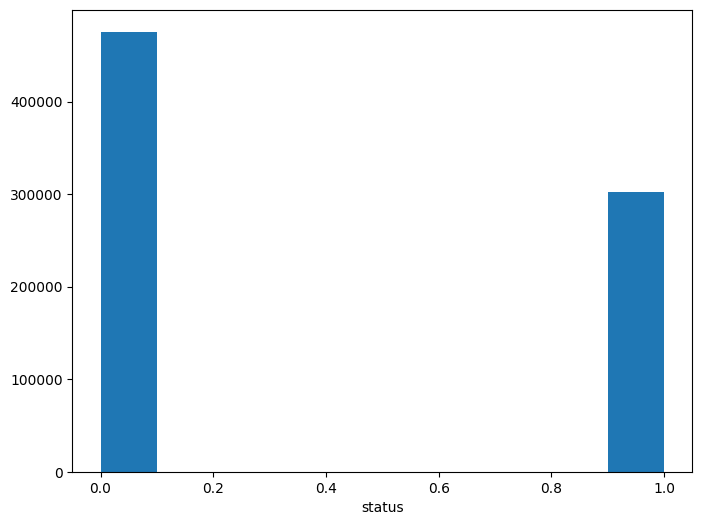

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['STATUS'].values, bins=10)
plt.xlabel('status')
plt.show()

In [ ]:
df['STATUS'].value_counts(normalize=True)

0    0.611388
1    0.388612
Name: STATUS, dtype: float64

<ipython-input-127-11bb9e2d646d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

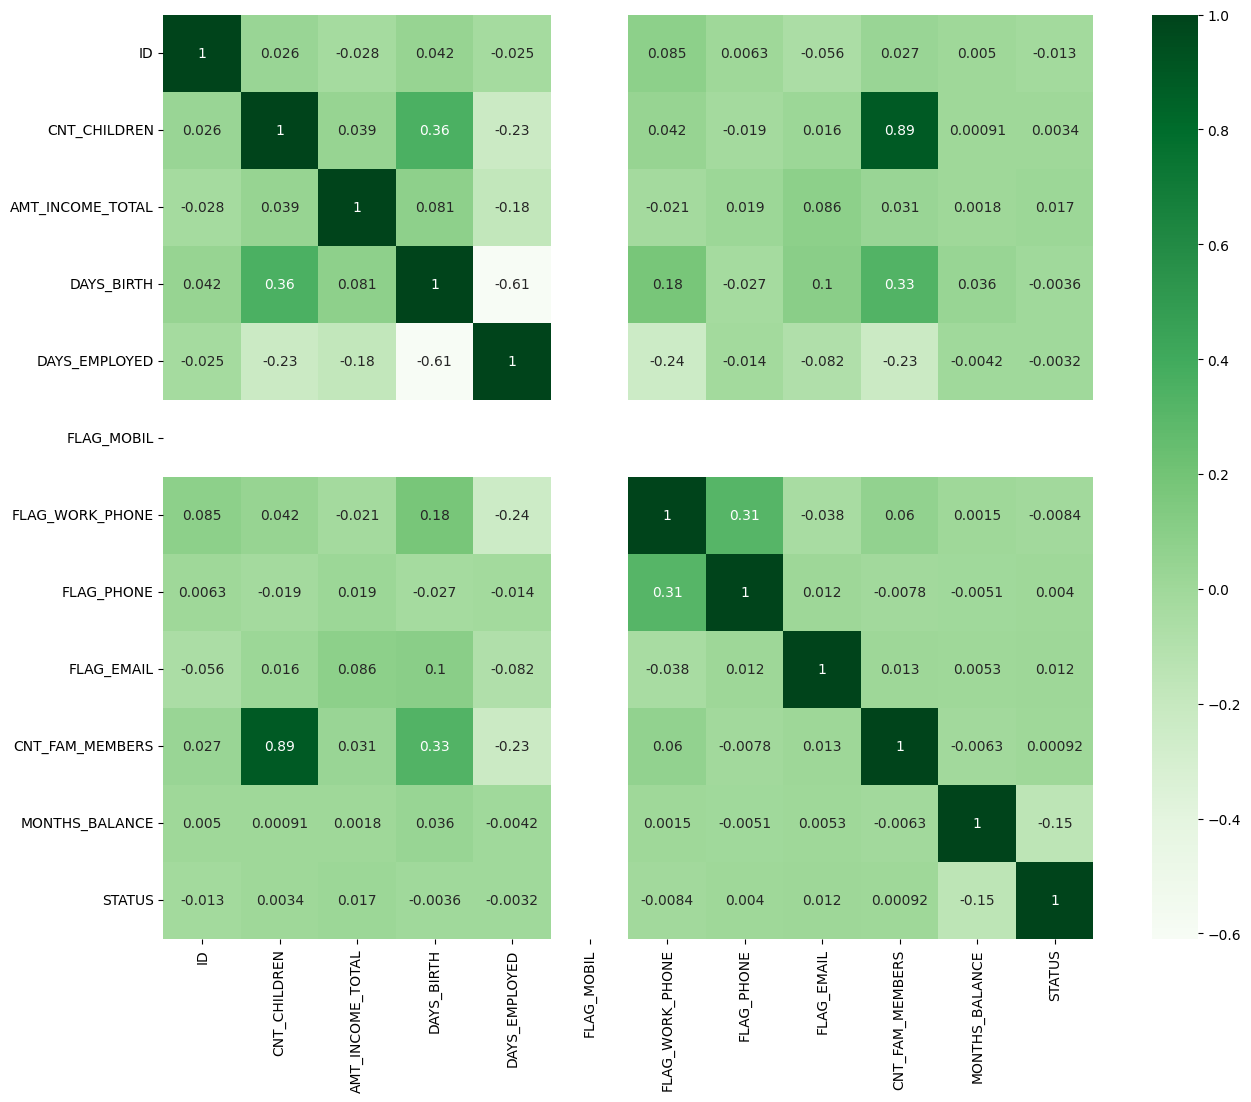

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Greens",annot=True)

In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                 Count Unique    Count Zeros    Count NAs    % of NAs
-------------------  --------------  -------------  -----------  ----------
ID                            36457              0            0           0
CODE_GENDER                       2              0            0           0
FLAG_OWN_CAR                      2              0            0           0
FLAG_OWN_REALTY                   2              0            0           0
CNT_CHILDREN                      9         540639            0           0
AMT_INCOME_TOTAL                265              0            0           0
NAME_INCOME_TYPE                  5              0            0           0
NAME_EDUCATION_TYPE               5              0            0           0
NAME_FAMILY_STATUS                5              0            0           0
NAME_HOUSING_TYPE                 6              0            0           0
DAYS_BIRTH                     7183              0            0           0
DAYS_EMPLOYE

In [ ]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(['M', 'F'], [1, 0])
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['Y', 'N'], [1, 0])
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['Y', 'N'], [1, 0])

In [ ]:
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'].astype('category')
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].astype('category')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].astype('category')
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].astype('category')

In [ ]:
df_numeric = df.drop(["NAME_INCOME_TYPE",	"NAME_EDUCATION_TYPE",	"NAME_FAMILY_STATUS",	"NAME_HOUSING_TYPE", "STATUS", "ID"], axis = 1)
def columnValue(df_numeric):
  row = [df_numeric.mean(), df_numeric.median(), df_numeric.std(), df_numeric.min(), df_numeric.max(), df_numeric.dtypes]
  return row

table = []
for column in df_numeric:
    table.append([column] + columnValue(df_numeric[column]))

print(tabulate(table, headers=["Column","mean","median","std","min", "max", "type"], tablefmt="orgbtl"))

Column                     mean    median            std     min             max  type
----------------  -------------  --------  -------------  ------  --------------  -------
CODE_GENDER            0.332852         0       0.471234       0       1          int64
FLAG_OWN_CAR           0.391352         0       0.488053       0       1          int64
FLAG_OWN_REALTY        0.659558         1       0.473858       0       1          int64
CNT_CHILDREN           0.428082         0       0.745755       0      19          int64
AMT_INCOME_TOTAL  188535           162000  101622          27000       1.575e+06  float64
DAYS_BIRTH        -16124.9         -15760    4104.3       -25152   -7489          int64
DAYS_EMPLOYED      57775.8          -1682  136472         -15713  365243          int64
FLAG_MOBIL             1                1       0              1       1          int64
FLAG_WORK_PHONE        0.231818         0       0.421993       0       1          int64
FLAG_PHONE             0.3009

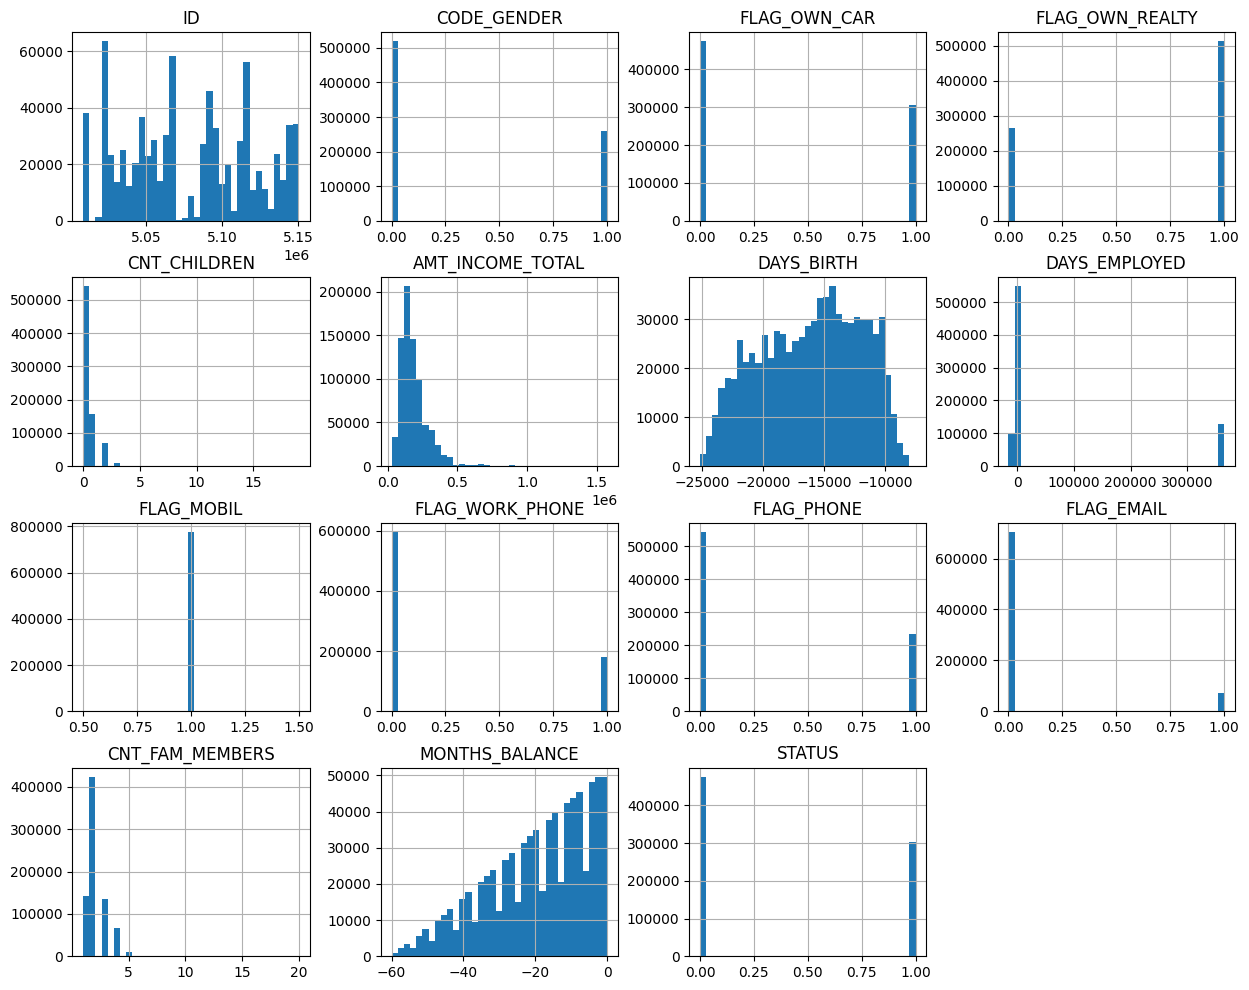

In [ ]:
df.hist(figsize = (15,12), bins=35);

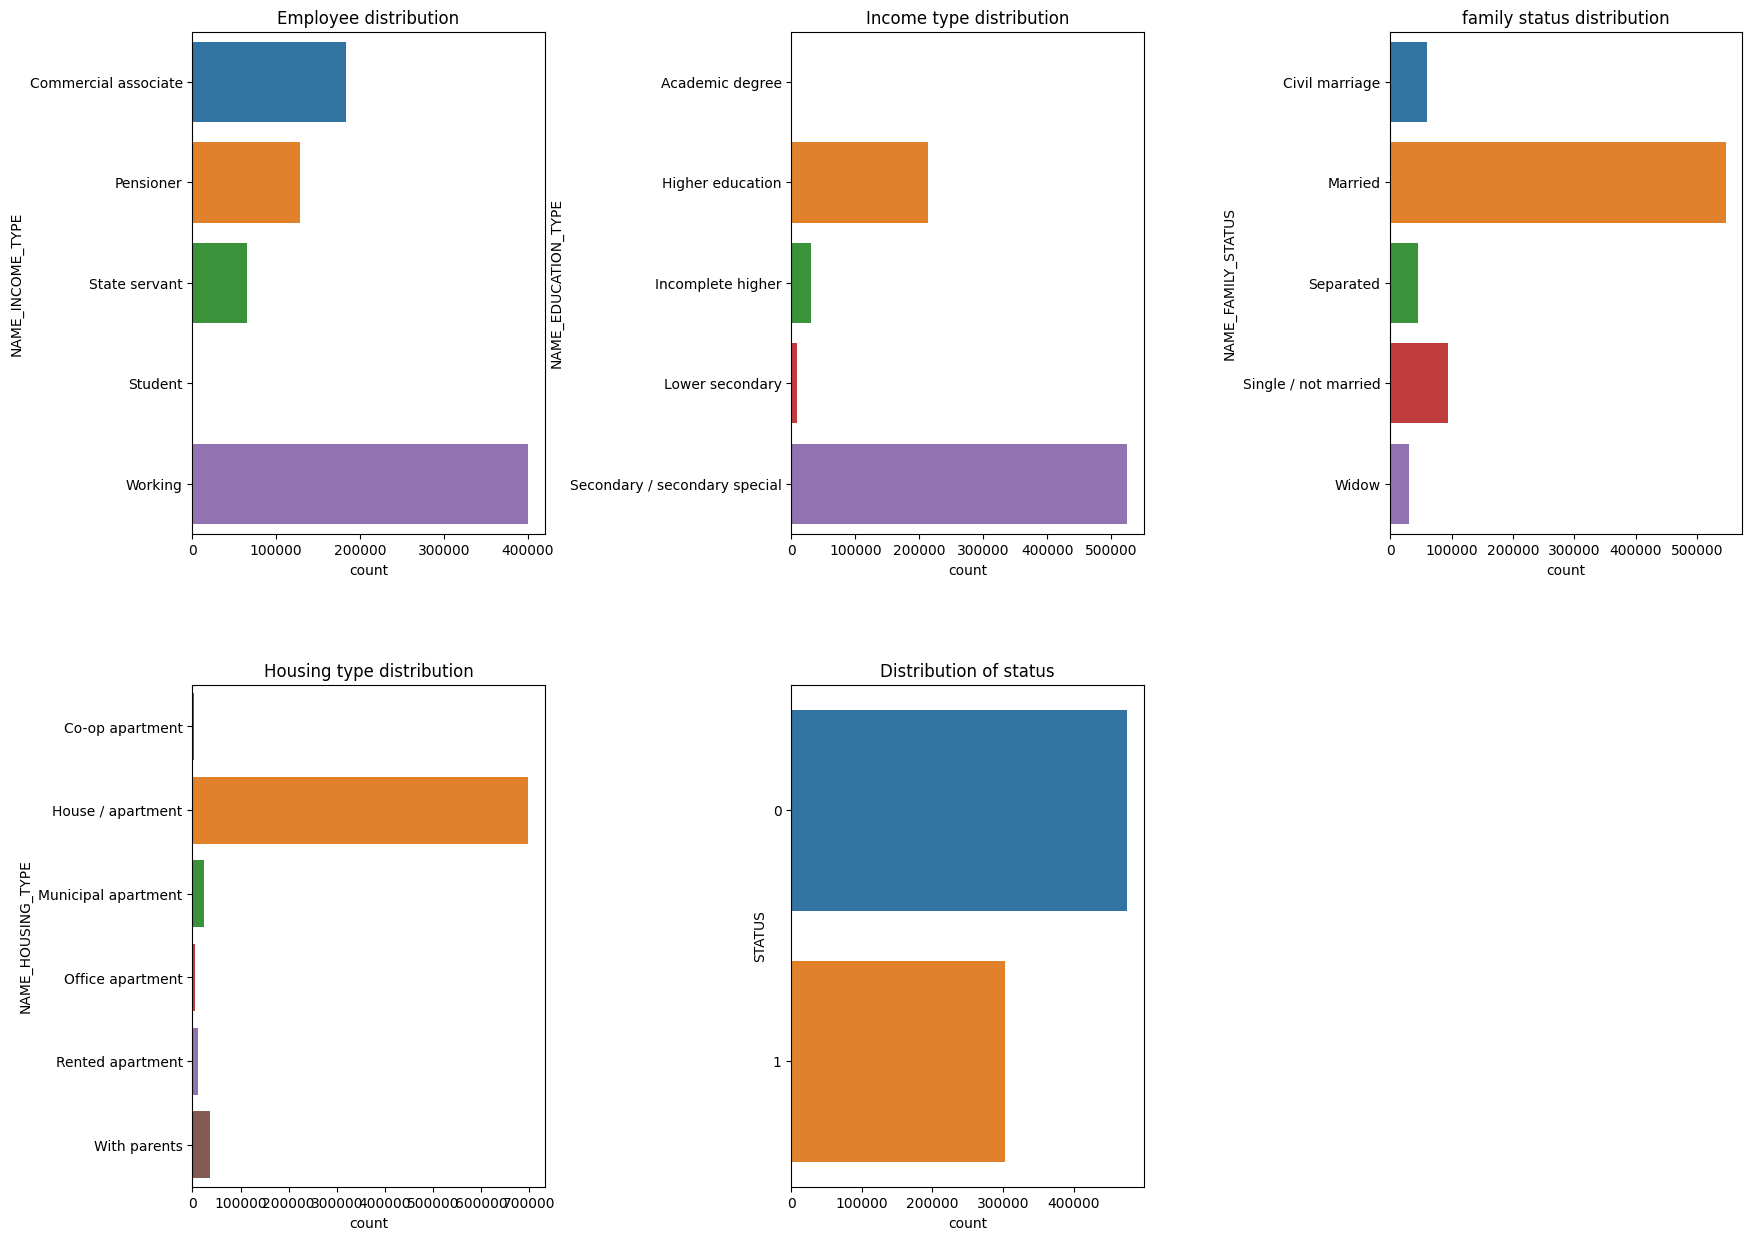

In [ ]:
#"NAME_INCOME_TYPE",	"NAME_EDUCATION_TYPE",	"NAME_FAMILY_STATUS",	"NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "STATUS", "ID"
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.countplot(y='NAME_INCOME_TYPE', data=df)
plt.title("Employee distribution")

plt.subplot(2, 3, 2)
sns.countplot(y='NAME_EDUCATION_TYPE', data=df)
plt.title("Income type distribution")

plt.subplot(2, 3, 3)
sns.countplot(y='NAME_FAMILY_STATUS', data=df)
plt.title("family status distribution")

plt.subplot(2, 3, 4)
sns.countplot(y='NAME_HOUSING_TYPE', data=df)
plt.title("Housing type distribution")

plt.subplot(2, 3, 5)
sns.countplot(y='STATUS', data=df)
plt.title("Distribution of status")

plt.subplots_adjust(wspace=0.7, hspace=0.3)

plt.show()

In [ ]:
df = pd.get_dummies(df, columns = ["NAME_INCOME_TYPE",	"NAME_EDUCATION_TYPE",	"NAME_FAMILY_STATUS",	"NAME_HOUSING_TYPE"])

In [ ]:
df.drop("ID", axis = 1, inplace = True)

In [ ]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,1,1,0,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,0,1,0
0,1,1,1,0,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,0,1,0
0,1,1,1,0,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,0,1,0
0,1,1,1,0,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,0,1,0
0,1,1,1,0,427500.0,-12005,-4542,1,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,1,0,1,0,112500.0,-9188,-1193,1,0,0,...,0,0,1,0,0,0,0,0,1,0
434812,1,0,1,0,112500.0,-9188,-1193,1,0,0,...,0,0,1,0,0,0,0,0,1,0
434812,1,0,1,0,112500.0,-9188,-1193,1,0,0,...,0,0,1,0,0,0,0,0,1,0
434812,1,0,1,0,112500.0,-9188,-1193,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X = df.drop("STATUS", axis=1)
y = df["STATUS"]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()
scale = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
df_ = pca.fit_transform(X)

Text(0, 0.5, 'Cumulative explained variance')

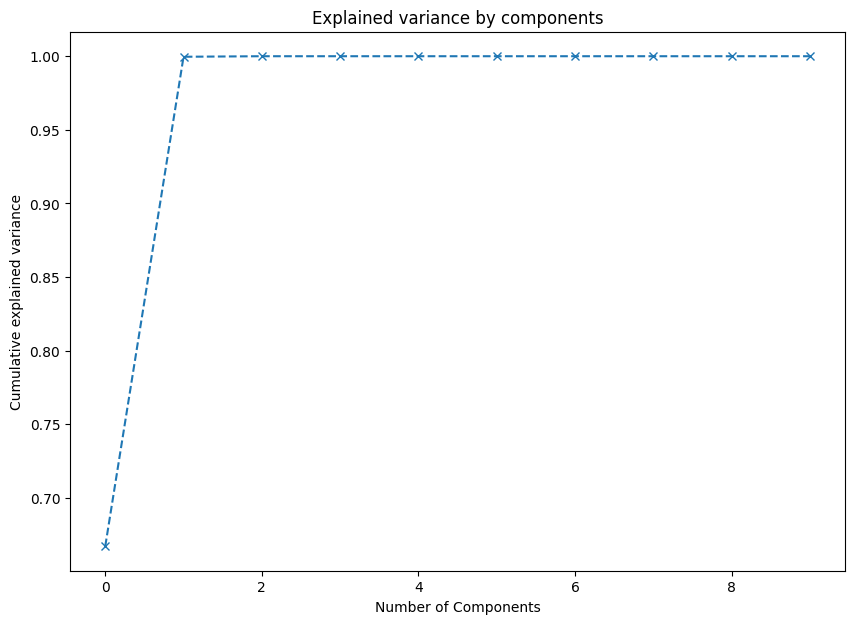

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(), marker = "x", linestyle = "--")
plt.title("Explained variance by components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")

In [ ]:
pca = PCA(n_components = 2)

X = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred), "\n",
      'Precision: %.3f' % precision_score(y_test, y_pred), "\n",
      'Recall: %.3f' % recall_score(y_test, y_pred), "\n",
      'F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.527 
 Precision: 0.393 
 Recall: 0.404 
 F1: 0.398


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred), "\n",
      'Precision: %.3f' % precision_score(y_test, y_pred), "\n",
      'Recall: %.3f' % recall_score(y_test, y_pred), "\n",
      'F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.715 
 Precision: 0.684 
 Recall: 0.491 
 F1: 0.572


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred), "\n",
      'Precision: %.3f' % precision_score(y_test, y_pred), "\n",
      'Recall: %.3f' % recall_score(y_test, y_pred), "\n",
      'F1: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.740 
 Precision: 0.678 
 Recall: 0.623 
 F1: 0.650


# Regression


In [ ]:
#https://www.kaggle.com/datasets/budincsevity/szeged-weather
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


<ipython-input-150-11bb9e2d646d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

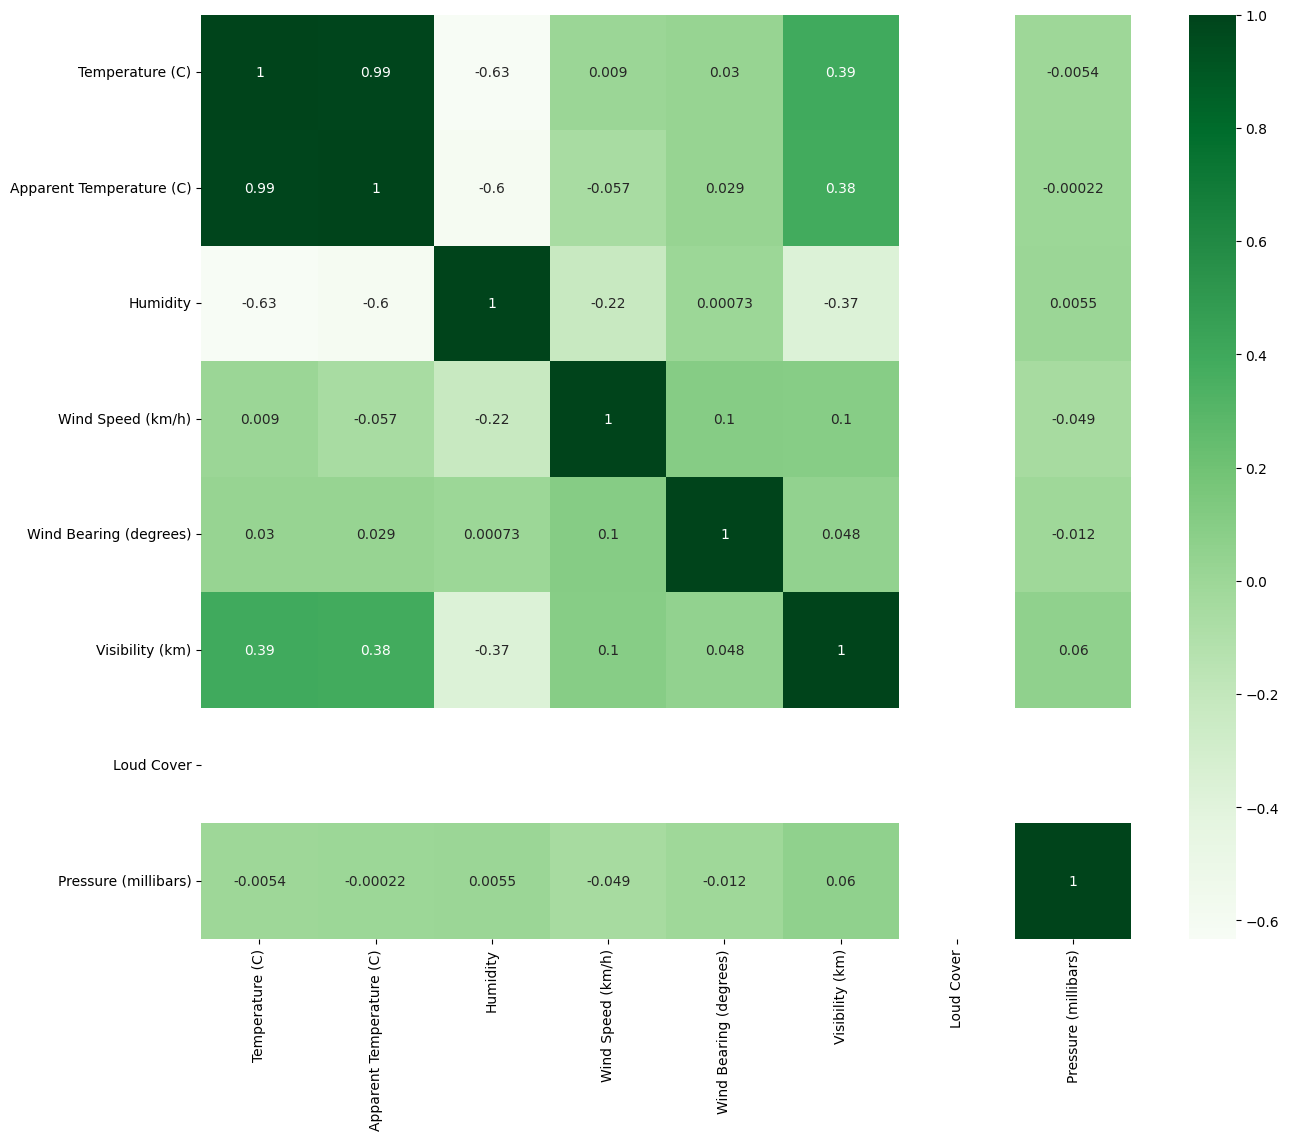

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Greens",annot=True)

In [ ]:
df.drop("Formatted Date", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.1+ MB


In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                      Count Unique    Count Zeros    Count NAs    % of NAs
------------------------  --------------  -------------  -----------  ----------
Summary                               27              0            0         0
Precip Type                            2              0          517         0.5
Temperature (C)                     7574            325            0         0
Apparent Temperature (C)            8984             69            0         0
Humidity                              90             22            0         0
Wind Speed (km/h)                   2484           1297            0         0
Wind Bearing (degrees)               360           2264            0         0
Visibility (km)                      949            450            0         0
Loud Cover                             1          96453            0         0
Pressure (millibars)                4979           1288            0         0
Daily Summary                        214      

In [ ]:
df_numeric = df.drop(["Summary",	"Precip Type", "Daily Summary"], axis = 1)
def columnValue(df_numeric):
  row = [df_numeric.mean(), df_numeric.median(), df_numeric.std(), df_numeric.min(), df_numeric.max(), df_numeric.dtypes]
  return row

table = []
for column in df_numeric:
    table.append([column] + columnValue(df_numeric[column]))

print(tabulate(table, headers=["Column","mean","median","std","min", "max", "type"], tablefmt="orgbtl"))

Column                           mean     median         std       min        max  type
------------------------  -----------  ---------  ----------  --------  ---------  -------
Temperature (C)             11.9327      12         9.55155   -21.8222    39.9056  float64
Apparent Temperature (C)    10.855       12        10.6968    -27.7167    39.3444  float64
Humidity                     0.734899     0.78      0.195473    0          1       float64
Wind Speed (km/h)           10.8106       9.9659    6.91357     0         63.8526  float64
Wind Bearing (degrees)     187.509      180       107.383       0        359       float64
Visibility (km)             10.3473      10.0464    4.19212     0         16.1     float64
Loud Cover                   0            0         0           0          0       float64
Pressure (millibars)      1003.24      1016.45    116.97        0       1046.38    float64


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Daily Summary"]= label_encoder.fit_transform(df["Daily Summary"])

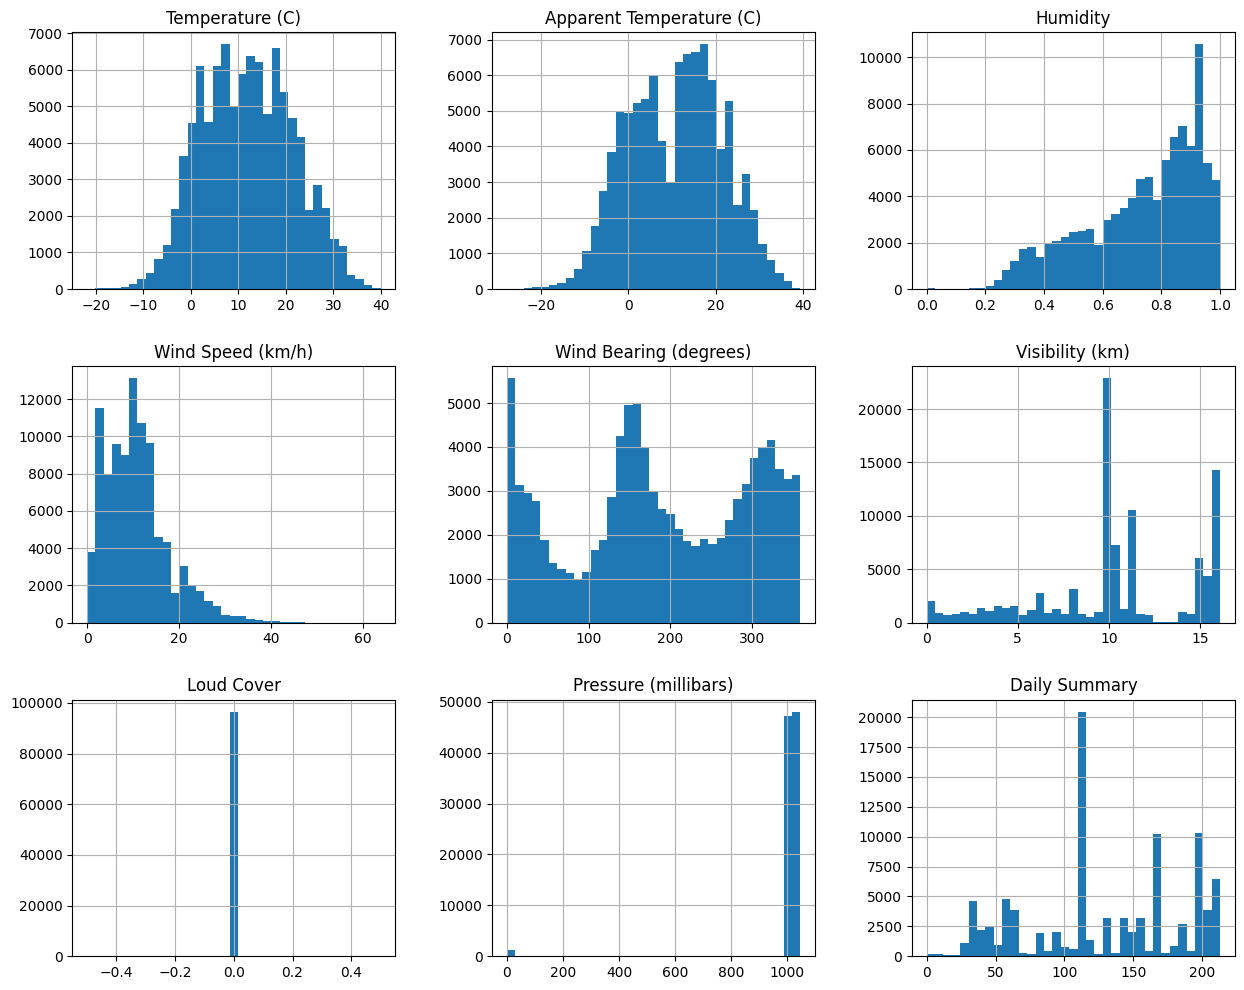

In [ ]:
df.hist(figsize = (15,12), bins=35);

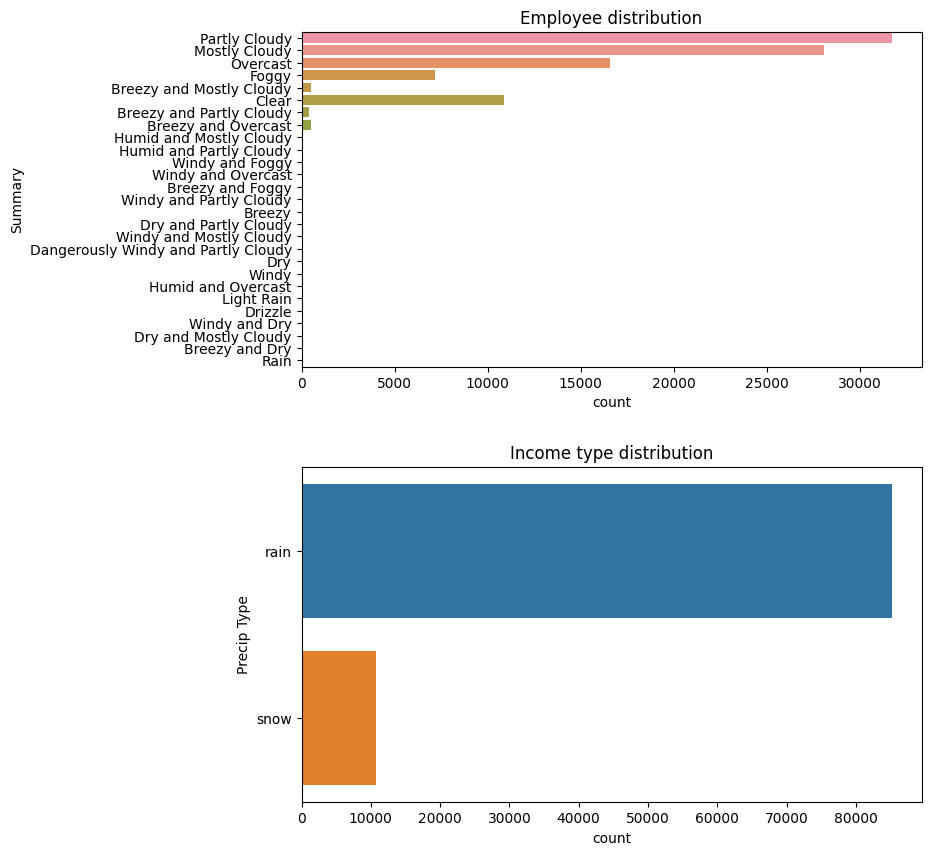

In [ ]:
#"Summary",	"Precip Type", "Daily Summary"
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
sns.countplot(y="Summary", data=df)
plt.title("Employee distribution")

plt.subplot(2, 1, 2)
sns.countplot(y="Precip Type", data=df)
plt.title("Income type distribution")

plt.subplots_adjust(wspace=0.7, hspace=0.3)

plt.show()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Summary"]= label_encoder.fit_transform(df["Summary"])

In [ ]:
df = pd.get_dummies(df, columns = ["Precip Type"])

In [ ]:
df

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_rain,Precip Type_snow
0,19,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197,1,0
1,19,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197,1,0
2,17,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197,1,0
3,19,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197,1,0
4,17,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,19,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170,1,0
96449,19,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170,1,0
96450,19,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170,1,0
96451,19,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170,1,0


In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                      Count Unique    Count Zeros    Count NAs    % of NAs
------------------------  --------------  -------------  -----------  ----------
Summary                               27             54            0           0
Temperature (C)                     7574            325            0           0
Apparent Temperature (C)            8984             69            0           0
Humidity                              90             22            0           0
Wind Speed (km/h)                   2484           1297            0           0
Wind Bearing (degrees)               360           2264            0           0
Visibility (km)                      949            450            0           0
Loud Cover                             1          96453            0           0
Pressure (millibars)                4979           1288            0           0
Daily Summary                        214             24            0           0
Precip Type_rain            

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

target = df["Humidity"]
data = df.drop("Humidity", axis=1)

data = scale.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Linear Regression


In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

0.10864806649740343

In [ ]:
print('R-squared: %.3f' % r2_score(y_test, y_pred), "\n",
      'MAE: %.3f' % mean_absolute_error(y_test, y_pred), "\n",
      'MSE: %.3f' % mean_squared_error(y_test, y_pred))

R-squared: 0.498 
 MAE: 0.109 
 MSE: 0.019


DecisionTree

In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [ ]:
print('R-squared: %.3f' % r2_score(y_test, y_pred), "\n",
      'MAE: %.3f' % mean_absolute_error(y_test, y_pred), "\n",
      'MSE: %.3f' % mean_squared_error(y_test, y_pred))

R-squared: 0.517 
 MAE: 0.092 
 MSE: 0.018


RandomForest

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

In [ ]:
print('R-squared: %.3f' % r2_score(y_test, y_pred), "\n",
      'MAE: %.3f' % mean_absolute_error(y_test, y_pred), "\n",
      'MSE: %.3f' % mean_squared_error(y_test, y_pred))

R-squared: 0.763 
 MAE: 0.067 
 MSE: 0.009


# Segmentation


In [ ]:
#https://www.kaggle.com/datasets/vetrirah/customer
test = pd.read_csv("Test.csv")
df = pd.read_csv("Train.csv")

In [ ]:
test.drop("ID", axis = 1, inplace = True)

In [ ]:
df.drop(["ID", "Segmentation"], axis=1, inplace=True)

In [ ]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [ ]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [ ]:
df = pd.concat([test, df])

In [ ]:
df.reset_index(drop= True , inplace= True )
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
10690,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
10691,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
10692,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
10693,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 752.1+ KB


In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column             Count Unique    Count Zeros    Count NAs    % of NAs
---------------  --------------  -------------  -----------  ----------
Gender                        2              0            0         0
Ever_Married                  2              0          190         1.8
Age                          67              0            0         0
Graduated                     2              0          102         1
Profession                    9              0          162         1.5
Work_Experience              15           3087         1098        10.3
Spending_Score                3              0            0         0
Family_Size                   9              0          448         4.2
Var_1                         7              0          108         1


In [ ]:
df["Work_Experience"].nunique()

15

In [ ]:
df_numeric = df.drop(["Gender",	"Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1",	"Segmentation"], axis = 1)

In [ ]:
def columnValue(df_numeric):
  row = [df_numeric.mean(), df_numeric.median(), df_numeric.std(), df_numeric.min(), df_numeric.max(), df_numeric.dtypes]
  return row

table = []
for column in df_numeric:
    table.append([column] + columnValue(df_numeric[column]))

print(tabulate(table, headers=["Column","mean","median","std","min", "max", "type"], tablefmt="orgbtl"))

Column                   mean    median         std     min     max  type
---------------  ------------  --------  ----------  ------  ------  -------
ID               463479          463472  2595.38     458982  467974  int64
Age                  43.4669         40    16.7117       18      89  int64
Work_Experience       2.64166         1     3.40676       0      14  float64
Family_Size           2.85012         3     1.53141       1       9  float64


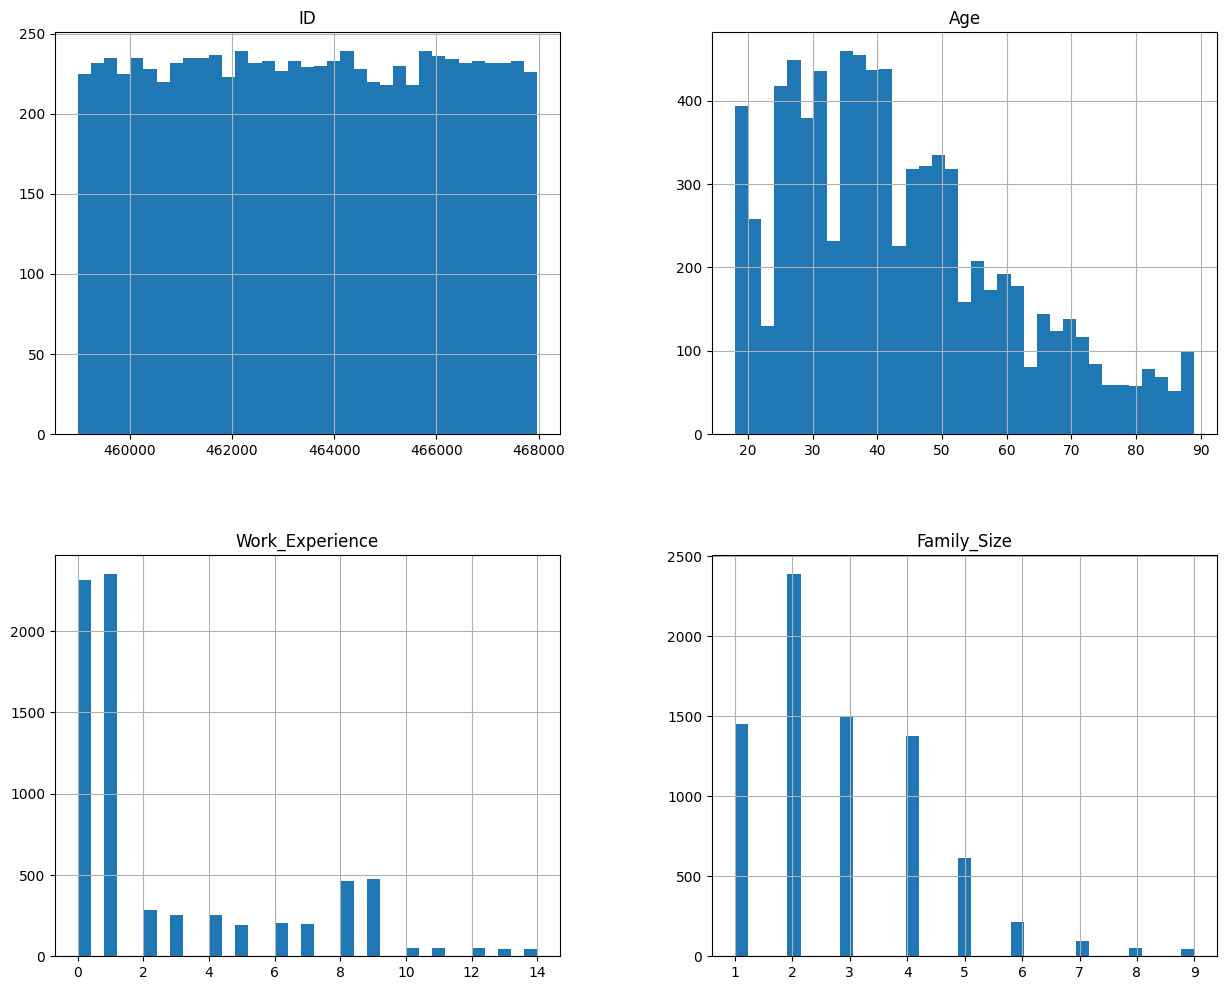

In [ ]:
df_numeric.hist(figsize = (15,12), bins=35);

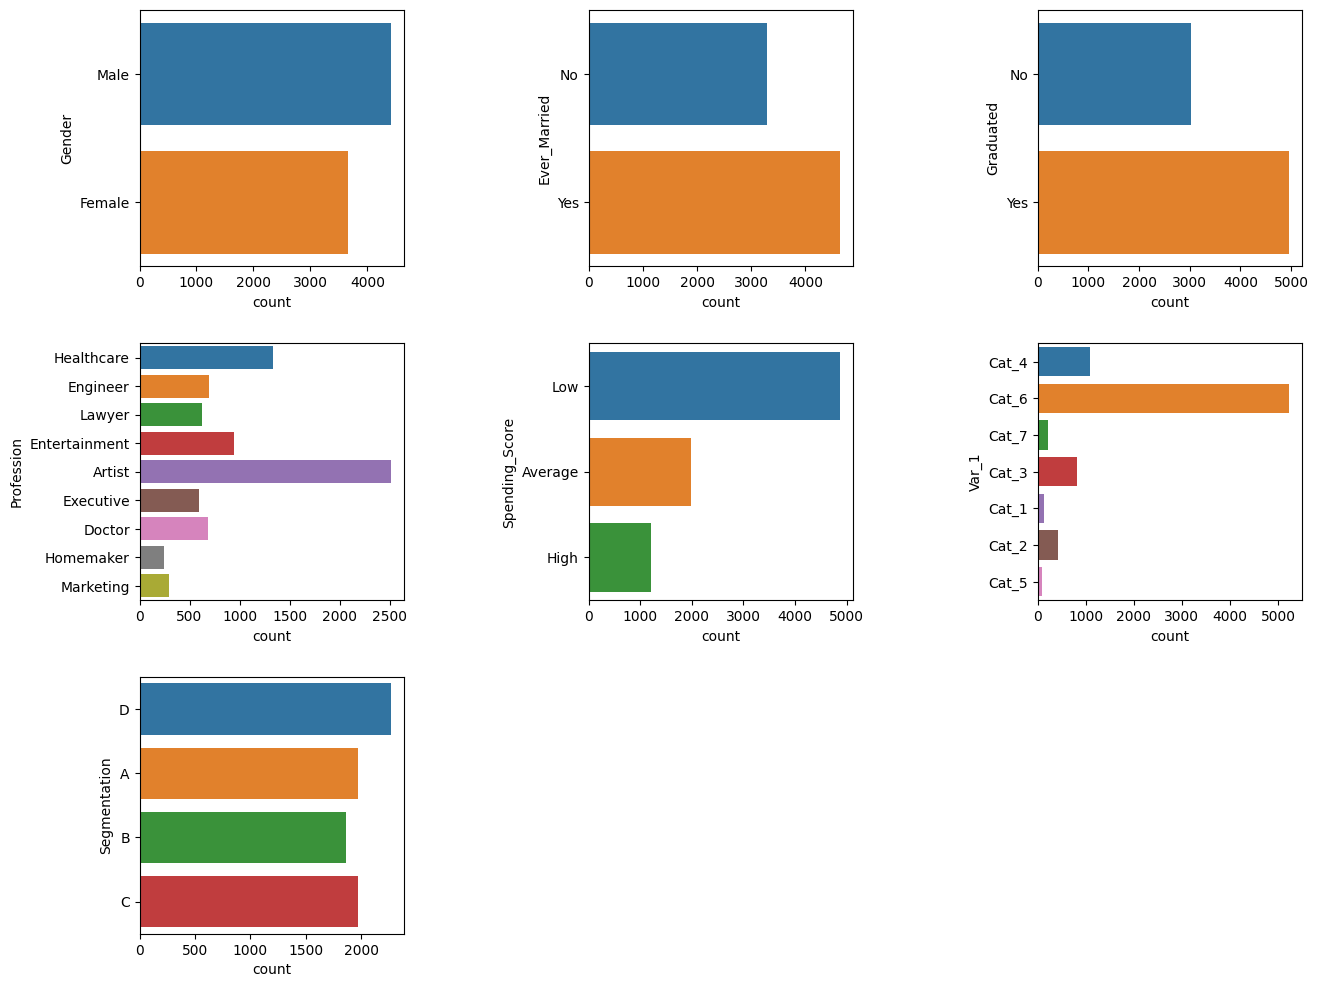

In [ ]:
#"Gender",	"Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1",	"Segmentation"
plt.figure(figsize=(15, 12))

plt.subplot(3, 3, 1)
sns.countplot(y="Gender", data=df)


plt.subplot(3, 3, 2)
sns.countplot(y="Ever_Married", data=df)


plt.subplot(3, 3, 3)
sns.countplot(y="Graduated", data=df)


plt.subplot(3, 3, 4)
sns.countplot(y="Profession", data=df)

plt.subplot(3, 3, 5)
sns.countplot(y="Spending_Score", data=df)


plt.subplot(3, 3, 6)
sns.countplot(y="Var_1", data=df)


plt.subplot(3, 3, 7)
sns.countplot(y="Segmentation", data=df)


plt.subplots_adjust(wspace=0.7, hspace=0.3)

plt.show()

In [ ]:
df["Ever_Married"]= df["Ever_Married"].fillna(0)

df.dropna(inplace=True)
train = df.copy()

In [ ]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
...,...,...,...,...,...,...,...,...,...
10689,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
10691,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
10692,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
10693,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [ ]:
df['Gender'] = df['Gender'].replace(['Male','Female',], [1, 0])
df['Ever_Married'] = df['Ever_Married'].replace(['Yes','No',], [1, 0])
df['Graduated'] = df['Graduated'].replace(['Yes','No',], [1, 0])

In [ ]:
df.drop(["ID", "Var_1", "Segmentation"], axis=1, inplace=True)

In [ ]:
df_dummies = pd.get_dummies(df, columns = ["Profession",	"Spending_Score"])

In [ ]:
df_dummies

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0,1,36,1,0.0,1.0,Cat_6,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,37,1,8.0,4.0,Cat_6,0,0,0,0,0,1,0,0,0,1,0,0
3,1,1,59,0,11.0,2.0,Cat_6,0,0,0,0,1,0,0,0,0,0,1,0
5,1,1,47,1,0.0,5.0,Cat_4,0,1,0,0,0,0,0,0,0,0,1,0
6,1,1,61,1,5.0,3.0,Cat_6,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,1,1,41,1,0.0,5.0,Cat_6,1,0,0,0,0,0,0,0,0,0,1,0
10691,1,0,35,0,3.0,4.0,Cat_4,0,0,0,0,1,0,0,0,0,0,0,1
10692,0,0,33,1,1.0,1.0,Cat_6,0,0,0,0,0,1,0,0,0,0,0,1
10693,0,0,27,1,1.0,4.0,Cat_6,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
def columnValues(df):
    row = [df.nunique(), (df==0).sum(axis=0), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df_dummies:
    table.append([column] + columnValues(df_dummies[column]))

print(tabulate(table, headers=["Column","Count Unique","Count Zeros","Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                      Count Unique    Count Zeros    Count NAs    % of NAs
------------------------  --------------  -------------  -----------  ----------
Gender                                 2           3049            0           0
Ever_Married                           2           2824            0           0
Age                                   67              0            0           0
Graduated                              2           2470            0           0
Work_Experience                       15           2167            0           0
Family_Size                            9              0            0           0
Profession_Artist                      2           4553            0           0
Profession_Doctor                      2           6169            0           0
Profession_Engineer                    2           6170            0           0
Profession_Entertainment               2           5952            0           0
Profession_Executive        

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_dummies["Var_1"]= label_encoder.fit_transform(df_dummies["Var_1"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
scale = scaler.fit_transform(df_dummies)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
df_ = pca.fit_transform(df_dummies)

Text(0, 0.5, 'Cumulative explained variance')

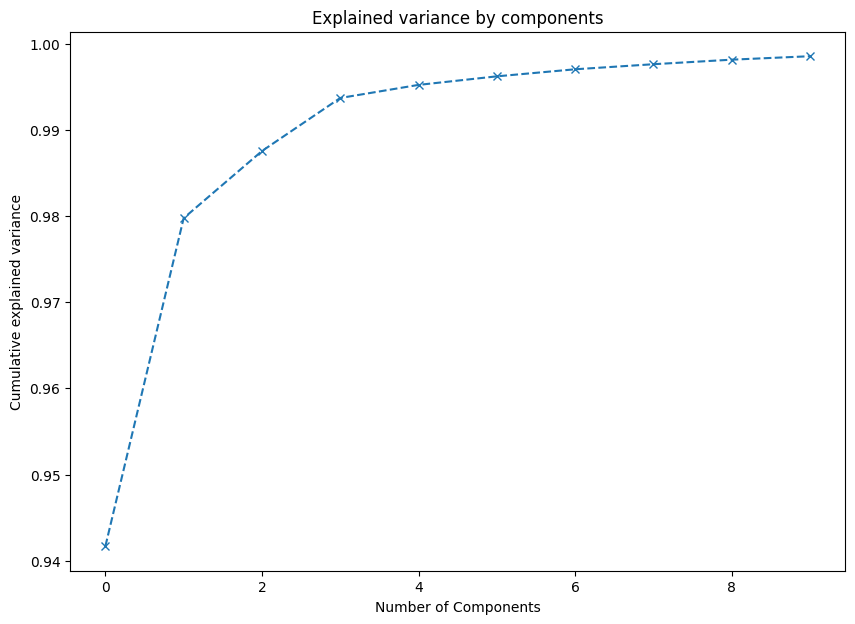

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(), marker = "x", linestyle = "--")
plt.title("Explained variance by components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")

In [ ]:
pca = PCA(n_components = 3)

X = pca.fit_transform(df_dummies)

In [ ]:
X = pd.DataFrame(X, columns=["PCA_component1", "PCA_component2", "PCA_component3"])

<Axes: xlabel='PCA_component1', ylabel='PCA_component2'>

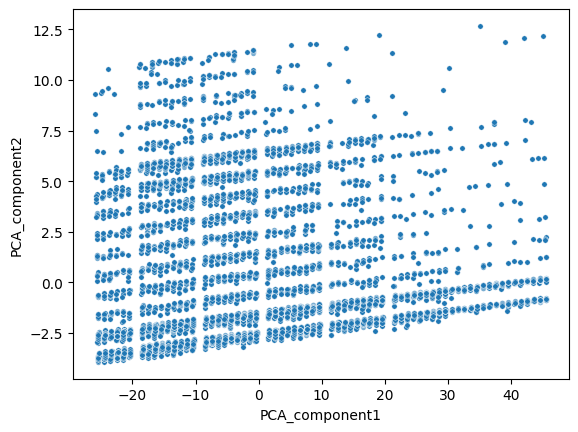

In [ ]:
sns.scatterplot(data=X, x="PCA_component1", y="PCA_component2", s=15)

In [ ]:
from sklearn.cluster import KMeans

clusters_centers = []
k_values = []

for k in range(1, 15):

    kmeans_model = KMeans(n_clusters = k, n_init=20, max_iter=500, random_state=42)
    kmeans_model.fit(X)

    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)

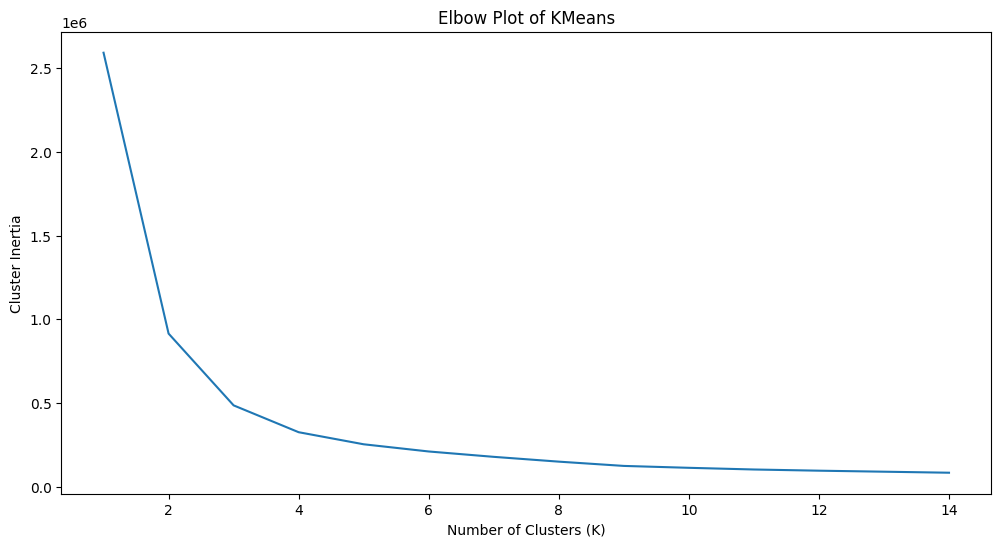

In [ ]:
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, clusters_centers)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 4, n_init=20, max_iter=500, random_state=42)
kmeans_model.fit(X)

KMeans(max_iter=500, n_clusters=4, n_init=20, random_state=42)

<Axes: >

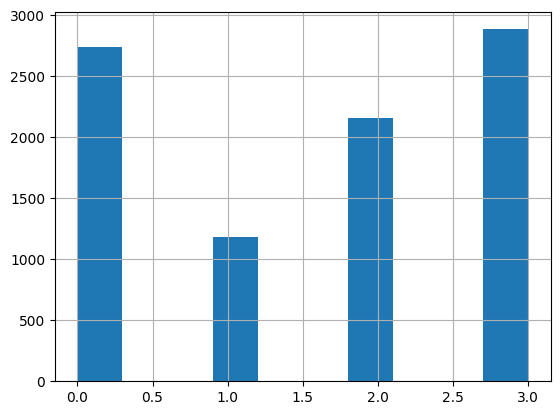

In [ ]:
df['cluster'] = kmeans_model.labels_
df['cluster'].hist()

<Axes: xlabel='PCA_component1', ylabel='PCA_component2'>

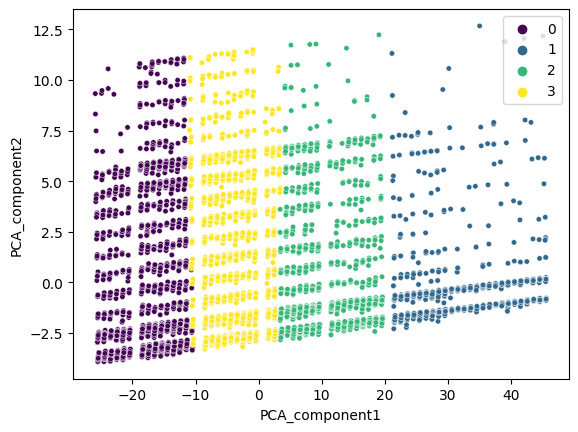

In [ ]:
sns.scatterplot(data=X, x="PCA_component1", y="PCA_component2", hue= kmeans_model.labels_, palette="viridis", s=15)

<Axes: >

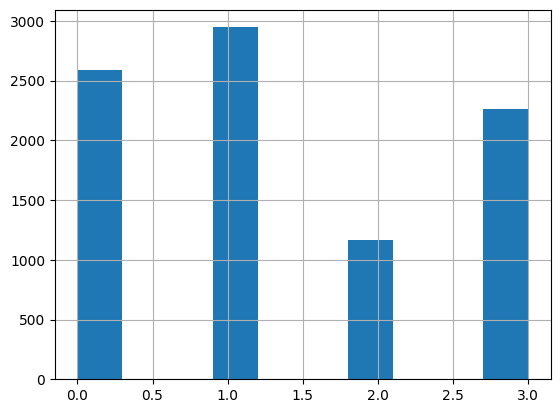

In [ ]:
from sklearn.cluster import AgglomerativeClustering

AgglomerativeC = AgglomerativeClustering(n_clusters=4, metric = 'euclidean')
y_AgglomerativeC = AgglomerativeC.fit_predict(X)
df['cluster'] = y_AgglomerativeC
df['cluster'].hist()

<Axes: xlabel='PCA_component1', ylabel='PCA_component2'>

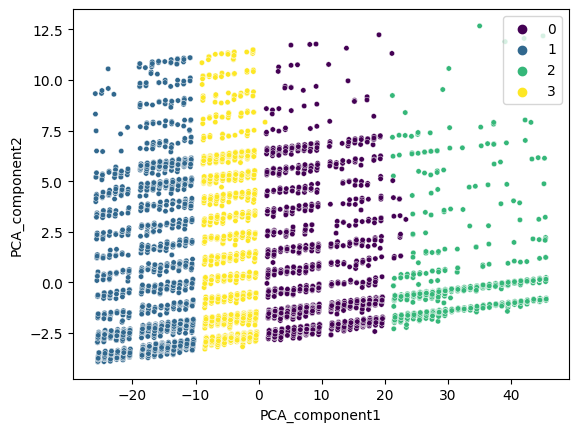

In [ ]:
sns.scatterplot(data=X, x="PCA_component1", y="PCA_component2", hue= AgglomerativeC.labels_, palette="viridis", s=15)